## Table of contents
A. [Preprocessing](#A.-Preprocessing)
1.  [Import Data](#1.-Import-Data)
2.  [Transform Data](#2.-Transform-Data)

B. [EDA](#B.-EDA)
1. [Volume](#I.-Volume)
2. [Number of Transactions](#II.-Number-of-Transactions)
3. [Average Volume per Transaction](#III.-Average-Volume-per-Transaction)
4. [Platform Wallets](#IV.-Platform-Wallets)
5. [Conclusion](#V.-Conclusion)

# A. Preprocessing

In [1]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from scipy import stats

## 1. Import Data

To analyze the impact of the Market on the decline in the Volume at the platform, extract the data of the Trading Volume of the Market <code>dex_data</code> and data of the Platform <code>raw_data</ code>.

In [2]:
dex_data = pd.read_csv('DEX_daily.csv', header=[0])
raw_data = pd.read_excel('raw_data.xlsx', header=[0])

Convert the <code>date</code> data field from both Dataframe to the same datatype datetime.

In [3]:
dex_data['date'] = pd.to_datetime(dex_data['date']).dt.date
raw_data['date'] = pd.to_datetime(raw_data['time'], unit='s').dt.date

In [4]:
dex_data.head()

,date,txn,volume
0,2022-01-01,51390,2.656818e+09
1,2022-01-02,51633,2.184683e+09
2,2022-01-03,52465,2.820679e+09
3,2022-01-04,52495,2.972148e+09
4,2022-01-05,52248,4.344361e+09


In [5]:
raw_data

,from,to,source_token,dest_token,time,platform,fee_usd,volume_usd,date
0,0x44537beefda25503da0317628298c6c8369b3ee3,0x70270C228c5B4279d1578799926873aa72446CcD,0x4A7397B0b86bB0f9482A3f4F16DE942f04E88702,0xEeeeeEeeeEeEeeEeEeEeeEEEeeeeEeeeeeeeEEeE,1648197188,k-ios,0.936914,1169.102960,2022-03-25
1,0xb7cb9ad04693b61b960077c41054e95f679b838e,0x70270C228c5B4279d1578799926873aa72446CcD,0x1E4EDE388cbc9F4b5c79681B7f94d36a11ABEBC9,0xEeeeeEeeeEeEeeEeEeEeeEEEeeeeEeeeeeeeEEeE,1645157103,k-web,0.660574,981.482371,2022-02-18
2,0x30661431d04982a4bc736bfaab828454265443be,0x70270C228c5B4279d1578799926873aa72446CcD,0x549020a9Cb845220D66d3E9c6D9F9eF61C981102,0xEeeeeEeeeEeEeeEeEeEeeEEEeeeeEeeeeeeeEEeE,1646664388,k-web,0.171142,231.145962,2022-03-07
3,0xecc81c21a307adfd7b9d8d10924140dd77295e10,0x70270C228c5B4279d1578799926873aa72446CcD,0x0E5C8C387C5EBa2eCbc137aD012aeD5Fe729e251,0xdAC17F958D2ee523a2206206994597C13D831ec7,1653387868,k-web,1.120242,1400.301989,2022-05-24
4,0x0b5fe588e5738a0bb9df4491a1529256d6a11c1b,0x70270C228c5B4279d1578799926873aa72446CcD,0xD567B5F02b9073aD3a982a099a23Bf019FF11d1c,0xdAC17F958D2ee523a2206206994597C13D831ec7,1656359522,k-ios,0.562811,703.513790,2022-06-27
...,...,...,...,...,...,...,...,...,...
153805,0xa398ed016b731f4f52422d049749097772af1e1b,0x8C27aBf05DE1d4847c3924566C3cBAFec6eFb42A,0xc7198437980c041c805A1EDcbA50c1Ce5db95118,0xEeeeeEeeeEeEeeEeEeEeeEEEeeeeEeeeeeeeEEeE,1648363265,k-web,1.166544,1457.013612,2022-03-27
153806,0xb4cf2ea0020d2c05c8e40bda9c47395c18a77df3,0x8C27aBf05DE1d4847c3924566C3cBAFec6eFb42A,0x8B1d98A91F853218ddbb066F20b8c63E782e2430,0xA7D7079b0FEaD91F3e65f86E8915Cb59c1a4C664,1641030195,k-web,0.000000,0.000000,2022-01-01
153807,0x1efc3c9d34c92e8711bb4def4236870533f085a4,0x8C27aBf05DE1d4847c3924566C3cBAFec6eFb42A,0x1DB749847C4abB991d8B6032102383e6BfD9B1c7,0xEeeeeEeeeEeEeeEeEeEeeEEEeeeeEeeeeeeeEEeE,1645438976,k-web,0.037241,46.514554,2022-02-21
153808,0x10e1e4dccbe012913f92d06e09ef3442e7ebd31f,0x8C27aBf05DE1d4847c3924566C3cBAFec6eFb42A,0x96d58F4646e988c236A4d2Bf57A0468E16E2DDFc,0xEeeeeEeeeEeEeeEeEeEeeEEEeeeeEeeeeeeeEEeE,1647573360,k-web,0.032800,40.966867,2022-03-18


## 2. Transform Data

In the transaction data of the Platform <code>raw_data</code>, every day there are many individual transactions, and each customer has many transactions.

Therefore, in order to easily analyze the trend of Transaction Volume at the Platform, put the data in time series format:
<ul>
     <li>Aggregate Sum Transaction Volume by Date</li>
     <li>Aggregate Count Number of Transactions by Date</li>
     <li>Aggregate Count Distinct Wallet number by Date to find Unique Wallet number</li>
</ul>

In [6]:
# Aggregate Count Unique Wallet by Date
wallet = raw_data[['from', 'date']]
wallet = wallet.groupby(['date'],as_index=False).nunique()

# Aggregate Count Number of Transaction at Platform by Date
txn = raw_data[['from', 'date']]
txn = txn.groupby(['date'],as_index=False).size()

# Aggregate Sum Transaction Volume at Platform by Date
volume = raw_data.groupby(['date'], as_index=False).sum()

# Merge data
raw_data = wallet.merge(volume, how='outer')
raw_data = raw_data.merge(txn, how='outer')
raw_data.drop(columns=['time'], inplace=True)
raw_data.head()

,date,from,fee_usd,volume_usd,size
0,2022-01-01,118,297.109940,3.713406e+05,279
1,2022-01-02,137,250.577714,4.076614e+05,370
2,2022-01-03,291,1468.805582,1.860128e+06,1067
3,2022-01-04,271,2159.212958,2.855317e+06,1205
4,2022-01-05,395,1430.436559,1.838224e+06,1083


#### Create the data fields needed for future analysis.

In [7]:
df = dex_data.merge(raw_data, how='outer')
df.columns = ['date', 'dex_txn', 'dex_vol', 'unique_wal', 'plat_fee', 'plat_vol', 'plat_txn']
df['dex_vol/txn'] = df['dex_vol']/df['dex_txn']
df['plat_vol/txn'] = df['plat_vol']/df['plat_txn']
df['plat_vol/wallet'] = df['plat_vol']/df['unique_wal']
df.set_index("date", inplace=True)
df

,dex_txn,dex_vol,unique_wal,plat_fee,plat_vol,plat_txn,dex_vol/txn,plat_vol/txn,plat_vol/wallet
date,,,,,,,,,
2022-01-01,51390,2.656818e+09,118,297.109940,3.713406e+05,279,51699.120704,1330.969975,3146.954433
2022-01-02,51633,2.184683e+09,137,250.577714,4.076614e+05,370,42311.762787,1101.787484,2975.630430
2022-01-03,52465,2.820679e+09,291,1468.805582,1.860128e+06,1067,53763.053788,1743.325214,6392.192451
2022-01-04,52495,2.972148e+09,271,2159.212958,2.855317e+06,1205,56617.730260,2369.557614,10536.224813
2022-01-05,52248,4.344361e+09,395,1430.436559,1.838224e+06,1083,83148.838348,1697.344165,4653.730964
...,...,...,...,...,...,...,...,...,...
2022-07-18,34680,2.825296e+09,225,364.196949,4.624516e+05,526,81467.579902,879.185583,2055.340519
2022-07-19,34507,3.103658e+09,588,2048.585160,3.460724e+06,2565,89942.863042,1349.210153,5885.585108
2022-07-20,34374,2.673336e+09,1060,2845.414275,4.396414e+06,3546,77772.043783,1239.823456,4147.560353


#### Data fields explanation:
<br><code>date</code>: date
<br><code>dex_txn</code>: Market Number of Transactions in a given day
<br><code>dex_vol</code>: Market Volume in a given day
<br><code>unique_wal</code>: Number of Wallets having transactions in a given day
<br><code>plat_txn</code>: Platform Number of Transactions in a given day
<br><code>plat_vol</code>: Platform Volume in a given day
<br><code>dex_vol/txn</code>: Average volume generated of 1 transaction at the Platform
<br><code>plat_vol/txn</code>: Average volume generated of 1 transaction of the Market
<br><code>plat_vol/wallet</code>: Average volume generated over 1 waller

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 203 entries, 2022-01-01 to 2022-07-22
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   dex_txn          203 non-null    int64  
 1   dex_vol          203 non-null    float64
 2   unique_wal       203 non-null    int64  
 3   plat_fee         203 non-null    float64
 4   plat_vol         203 non-null    float64
 5   plat_txn         203 non-null    int64  
 6   dex_vol/txn      203 non-null    float64
 7   plat_vol/txn     203 non-null    float64
 8   plat_vol/wallet  203 non-null    float64
dtypes: float64(6), int64(3)
memory usage: 15.9+ KB


In [9]:
df.describe()

,dex_txn,dex_vol,unique_wal,plat_fee,plat_vol,plat_txn,dex_vol/txn,plat_vol/txn,plat_vol/wallet
count,203.000000,2.030000e+02,203.000000,203.000000,2.030000e+02,203.000000,203.000000,203.000000,203.000000
mean,36969.088670,2.750305e+09,340.857143,887.952874,1.240946e+06,757.684729,74706.989131,1244.168355,3175.221191
std,8160.733526,1.539339e+09,573.154960,1916.054689,2.536926e+06,1153.723850,39149.791405,1245.624189,4073.492497
min,9829.000000,3.203131e+08,5.000000,0.595549,7.467079e+02,8.000000,30079.031486,20.131379,22.004066
25%,30022.000000,1.948704e+09,31.000000,17.277242,2.931766e+04,65.000000,54249.858820,331.119767,597.771824
50%,38143.000000,2.493214e+09,137.000000,179.540030,2.756653e+05,262.000000,66841.274467,974.890072,1809.983556
75%,42560.500000,3.004101e+09,380.500000,797.628409,1.217375e+06,964.500000,81281.629961,1665.362329,4009.079763
max,57649.000000,1.251230e+10,3705.000000,13256.705767,1.657198e+07,6575.000000,345376.473391,9602.448055,30304.067423


In [10]:
df.to_csv('market.csv')

In [11]:
df

,dex_txn,dex_vol,unique_wal,plat_fee,plat_vol,plat_txn,dex_vol/txn,plat_vol/txn,plat_vol/wallet
date,,,,,,,,,
2022-01-01,51390,2.656818e+09,118,297.109940,3.713406e+05,279,51699.120704,1330.969975,3146.954433
2022-01-02,51633,2.184683e+09,137,250.577714,4.076614e+05,370,42311.762787,1101.787484,2975.630430
2022-01-03,52465,2.820679e+09,291,1468.805582,1.860128e+06,1067,53763.053788,1743.325214,6392.192451
2022-01-04,52495,2.972148e+09,271,2159.212958,2.855317e+06,1205,56617.730260,2369.557614,10536.224813
2022-01-05,52248,4.344361e+09,395,1430.436559,1.838224e+06,1083,83148.838348,1697.344165,4653.730964
...,...,...,...,...,...,...,...,...,...
2022-07-18,34680,2.825296e+09,225,364.196949,4.624516e+05,526,81467.579902,879.185583,2055.340519
2022-07-19,34507,3.103658e+09,588,2048.585160,3.460724e+06,2565,89942.863042,1349.210153,5885.585108
2022-07-20,34374,2.673336e+09,1060,2845.414275,4.396414e+06,3546,77772.043783,1239.823456,4147.560353


# B. EDA

## Market Analysis

## I. Volume

### 1. Market Volume

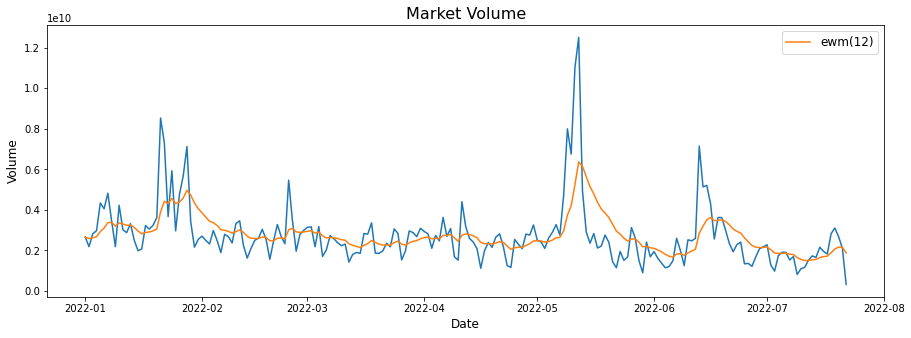

In [12]:
df_ewm = df.ewm(span=12, adjust=False).mean()

plt.figure(figsize=(15, 5))
plt.plot(df["dex_vol"])
plt.plot(df_ewm["dex_vol"], label="ewm(12)")
plt.xlabel("Date", fontsize=12)
plt.ylabel("Volume", fontsize=12)
plt.title("Market Volume", fontsize=16)
plt.legend(fontsize=12)
plt.show()

Take a look at the chart as a whole, there is no obvious trend for the Market Volume during the observation period. However, there are peaks (outliers), that require our attention.

In [13]:
# Define Outliers
def detect_outliers(series):
    Q1 = np.quantile(series, 0.25)
    Q3 = np.quantile(series, 0.75)
    IQR = Q3-Q1
    lower_bound = Q1-1.5*IQR
    upper_bound = Q3+1.5*IQR
    lower_compare = series <= lower_bound
    upper_compare = series >= upper_bound
    outlier_idxs = np.where(lower_compare | upper_compare)[0]
    return outlier_idxs

outlier_idxs=detect_outliers(df["dex_vol"])
print(df.index[outlier_idxs].values)

[datetime.date(2022, 1, 7) datetime.date(2022, 1, 21)
 datetime.date(2022, 1, 22) datetime.date(2022, 1, 24)
 datetime.date(2022, 1, 26) datetime.date(2022, 1, 27)
 datetime.date(2022, 1, 28) datetime.date(2022, 2, 24)
 datetime.date(2022, 5, 8) datetime.date(2022, 5, 9)
 datetime.date(2022, 5, 10) datetime.date(2022, 5, 11)
 datetime.date(2022, 5, 12) datetime.date(2022, 5, 13)
 datetime.date(2022, 6, 13) datetime.date(2022, 6, 14)
 datetime.date(2022, 6, 15) datetime.date(2022, 7, 22)]


#### The periods when there is a significant increase in market volume are:
<ul>
    <li>2022/01/07</li>
    <li>2022/01/21 - 2022/01/24</li>
    <li>2022/01/26 - 2022/01/28</li>
    <li>2022/02/24</li>
    <li>2022/05/08 - 2022/05/13 (Volume cao nhất)</li>
    <li>2022/06/13 - 2022/06/15</li>
    <li>2022/07/22</li>
</ul> 

#### Trend, Seasonal, Error

Analyze the variables Trend, Seasonal, and Error to have a better understanding of the volatility of Market Volume. Since the data were gathered over a period of seven months (two quarters), they should be analyzed using the model <code>multiplicative</code> in the M1 frame (period=30 days).

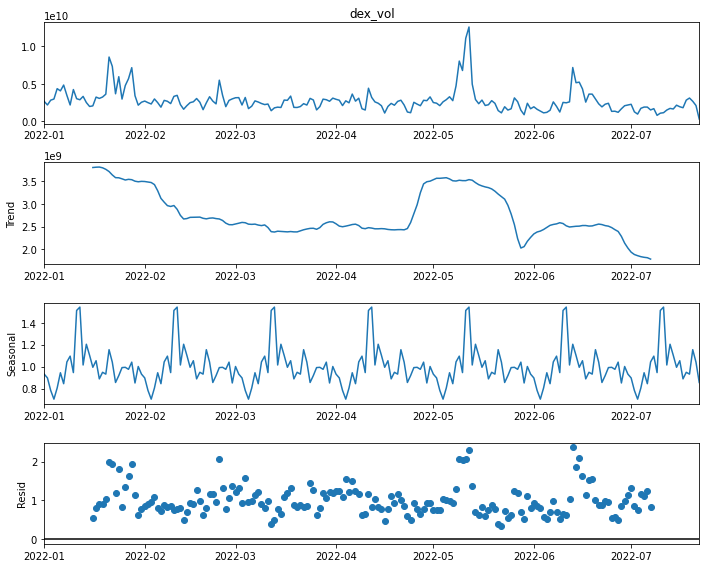

In [14]:
plt.rcParams.update({'figure.figsize': (10,8)})
decompose = seasonal_decompose(df['dex_vol'],model='multiplicative', period=30)
decompose.plot()
plt.show()

Regarding Trend, Market Volume is trending sideways, unclear, even slightly decreasing. This is understandable because the Crypto situation from the beginning of 2022 to now is quite bleak, constantly receiving bad news. Especially, the transaction volume has increased sharply in 2022/05/08 - 2022/05/13. This spike in volume comes from traders constantly selling off in large volumes (collapse of stablecoin LUNA).

Regarding Seasonal, Trading volume has a strong increase pattern near the beginning of the month and then gradually decreases.

### 2. Platform Volume

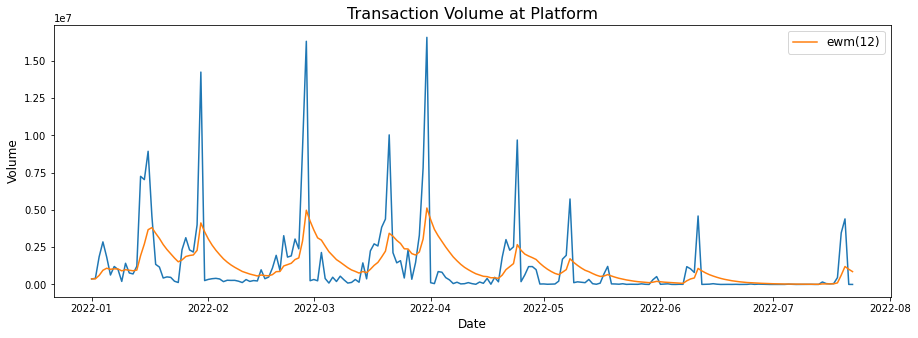

In [15]:
plt.figure(figsize=(15, 5))
plt.plot(df["plat_vol"])
plt.plot(df_ewm["plat_vol"], label="ewm(12)")
plt.xlabel("Date", fontsize=12)
plt.ylabel("Volume", fontsize=12)
plt.title("Transaction Volume at Platform", fontsize=16)
plt.legend(fontsize=12)
plt.show()

In general, Platform Volume is on a downward trend, most clearly starting from April 2022 onwards, and peaks appear at the following times: mid-January, late-January 1-2-3-4- July, early May-June.

In [16]:
outlier_idxs=detect_outliers(df["plat_vol"])
print(df.index[outlier_idxs].values)

[datetime.date(2022, 1, 14) datetime.date(2022, 1, 15)
 datetime.date(2022, 1, 16) datetime.date(2022, 1, 17)
 datetime.date(2022, 1, 26) datetime.date(2022, 1, 29)
 datetime.date(2022, 1, 30) datetime.date(2022, 2, 21)
 datetime.date(2022, 2, 24) datetime.date(2022, 2, 26)
 datetime.date(2022, 2, 27) datetime.date(2022, 3, 19)
 datetime.date(2022, 3, 20) datetime.date(2022, 3, 21)
 datetime.date(2022, 3, 29) datetime.date(2022, 3, 30)
 datetime.date(2022, 3, 31) datetime.date(2022, 4, 21)
 datetime.date(2022, 4, 24) datetime.date(2022, 5, 8)
 datetime.date(2022, 6, 11) datetime.date(2022, 7, 19)
 datetime.date(2022, 7, 20)]


#### The periods when there is a significant increase in Platform Volume are:
<ul>
    <li>2022/01/14 - 2022/01/17</li>
    <li>2022/01/26 - 2022/01/30</li>
    <li>2022/02/21</li>
    <li>2022/02/24</li>
    <li>2022/02/26 - 2022/02/27</li>
    <li>2022/03/19 - 2022/03/21</li>
    <li>2022/03/29 - 2022/03/31</li>
    <li>2022/04/21 - 2022/04/24</li>
    <li>2022/05/08</li>
    <li>2022/06/11</li>
    <li>2022/07/19 - 2022/07/20</li>
</ul>

#### Trend, Seasonal, Error

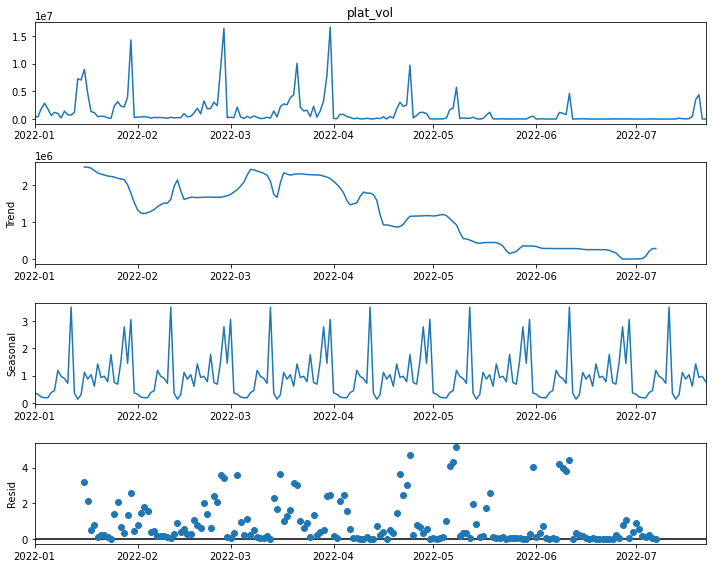

In [17]:
plt.rcParams.update({'figure.figsize': (10,8)})
decompose = seasonal_decompose(df['plat_vol'],model='multiplicative', period=30)
decompose.plot()
plt.show()

Regarding Trend, Platform Volume is in a downtrend. The most obvious downtrend starts from April 2022 onwards.

Regarding Seasonal, Platform Volume has a strong increasing pattern near the beginning of the month, moving sideways and increasing strongly at the end of the month.

### 3. Correlation

Study the Correlation coefficient between these 2 time series to have a more quantitative view, to be more sure about the correlation between Market Volume and Platform Volume

To increase the Correlation and increase the accuracy of the hypothesis, add a slip parameter (lag). That is to let the data on the Platform go after the market for a period of time (n days) because we assume the market may have an impact on the floor but not immediately.

Select the slip (lag) parameter for 1-7 days. Because this could be a reasonable time for Platform traders to react to general market fluctuations.

Measure the Cross Correlation coefficient between 2 time series according to the given lag parameter.

In [18]:
def shift_time(df, lag=0):
    cols ={}
    df = df.copy()
    for i in range(1,lag+1):
        for x in list(df.columns):
            if not x in cols:
                cols[x] = ['{}_{}'.format(x, i)]
            else:
                cols[x].append('{}_{}'.format(x, i))
    for k,v in cols.items():
        columns = v
        dfn = pd.DataFrame(data=None, columns=columns, index=df.index)    
        i = 1
        for c in columns:
            dfn[c] = df[k].shift(periods=i)
            i+=1
        df = pd.concat([df, dfn], axis=1)
    return df

In [19]:
# Dịch 'Khối lượng giao dịch của toàn thị trường' về quá khứ 1-7 ngày
dex_vol_shifted = shift_time(df[['dex_vol']], 7)

df_shifted1 = pd.concat([df[['plat_vol']], dex_vol_shifted], axis=1)
df_shifted1.head(7)

,plat_vol,dex_vol,dex_vol_1,dex_vol_2,dex_vol_3,dex_vol_4,dex_vol_5,dex_vol_6,dex_vol_7
date,,,,,,,,,
2022-01-01,3.713406e+05,2.656818e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-01-02,4.076614e+05,2.184683e+09,2.656818e+09,NaN,NaN,NaN,NaN,NaN,NaN
2022-01-03,1.860128e+06,2.820679e+09,2.184683e+09,2.656818e+09,NaN,NaN,NaN,NaN,NaN
2022-01-04,2.855317e+06,2.972148e+09,2.820679e+09,2.184683e+09,2.656818e+09,NaN,NaN,NaN,NaN
2022-01-05,1.838224e+06,4.344361e+09,2.972148e+09,2.820679e+09,2.184683e+09,2.656818e+09,NaN,NaN,NaN
2022-01-06,6.336641e+05,4.053000e+09,4.344361e+09,2.972148e+09,2.820679e+09,2.184683e+09,2.656818e+09,NaN,NaN
2022-01-07,1.205219e+06,4.823213e+09,4.053000e+09,4.344361e+09,2.972148e+09,2.820679e+09,2.184683e+09,2.656818e+09,NaN


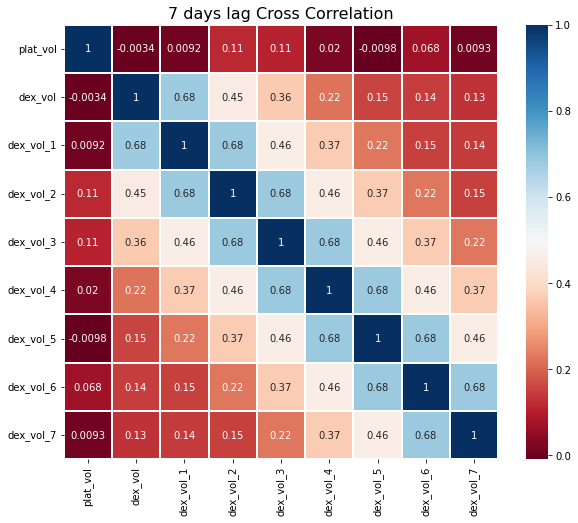

In [20]:
plt.figure(figsize=(10, 8))
plt.title('7 days lag Cross Correlation', size=16)

svm = sns.heatmap(df_shifted1.corr(), linewidths=0.1,vmax=1.0, square=True, cmap=plt.cm.RdBu, linecolor='white', annot=True)

Looking at the Cross Correlation Matrix, Market Volume and Platform Volume correlate best with lag parameters of 2 and 3 (0.11)

Thus, it can be commented that the general market's trends and fluctuations have an influence on the trading volume on the Platform. And the impact is most noticeable 2-3 days after the market's volatility.

### 4. Conclusion

After analyzing the volatility of Market Volume and Platform Volume, we draw the following comments and assumptions:

#### Trend
The decline in Platform Volume may be influenced by the general trend of the whole market.
<br>If you look at the Market Volume, this downtrend will not be obvious. Since the beginning of 2022, the Market Volume has been flat, even decreased slightly, only around 2022/05/08 there was a sudden surge in trading volume (probably the selling volume of traders due to the collapse LUNA).


#### Ouliers
On the time series chart of Market Volume and Platform Volume, there are peak points (spill high Volume). And we can find the times when these peaks appear on both graphs:
<ul>
    <li>2022/01/26 - 2022/01/28</li>
    <li>2022/02/24</li>
    <li>2022/05/08</li>
    <li>2022/06/13 - 2022/06/15</li>
</ul>

##### Comment:
<ul>
    <li>Almost every time the Market Volume recorded spikes, the same thing happened in the Platform Volume.
    <li>Market Volume and Platform Volume both reached very high levels in the period 2022/01/26 - 2022/01/28
    <li>At the time of 2022/05/08 - 2022/05/13 recording a record market volume since the beginning of the year, Platform also recorded a significant trading volume.
    <li>At the end of T2, T3, T4 when Platform Volume reached a very high level, the Market Volume kept at a fairly normal level. (Assumption: Maybe that is the time when marketing campaigns appear, promoting transactions).
</ul>

#### Seasonal
Market Volume and Platform Volume have a strong increasing pattern near the beginning of the month.
<br>However, for Platform Volume, there appeared a pattern that continued to increase strongly at the end of the month instead of decreasing steadily like Market Volume. Maybe this difference comes from the marketing campaigns launched at the end of the month.

#### Correlation
With a lag parameter of 2-3 days, Platform Volume and Market Volume have a positive correlation coefficient (0.11).
<br>Thus, it can be commented that the general market's trend and fluctuations have an influence on the trading volume on Platform. And the effect occurs most clearly after 2-3 days since the general market fluctuated.

## II. Number of Transactions

### 1. Market Number of Transactions

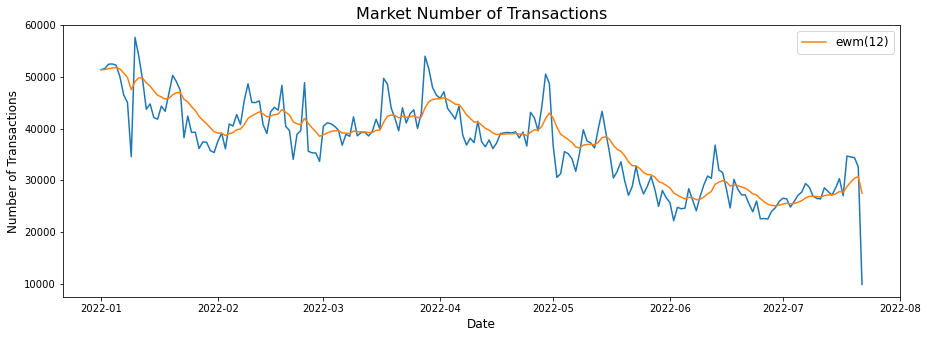

In [21]:
plt.figure(figsize=(15, 5))
plt.plot(df["dex_txn"])
plt.plot(df_ewm["dex_txn"], label="ewm(12)")
plt.xlabel("Date", fontsize=12)
plt.ylabel("Number of Transactions", fontsize=12)
plt.title("Market Number of Transactions", fontsize=16)
plt.legend(fontsize=12)
plt.show()

In general, Market Number of Transactions is trending down. There is a very later drop point on 2022/07/22. It is possible that this outlier occurs because the transaction data for this day has not been recorded in its entirety (this is the last date recorded in the dataset).

#### Trend, Seasonal, Error

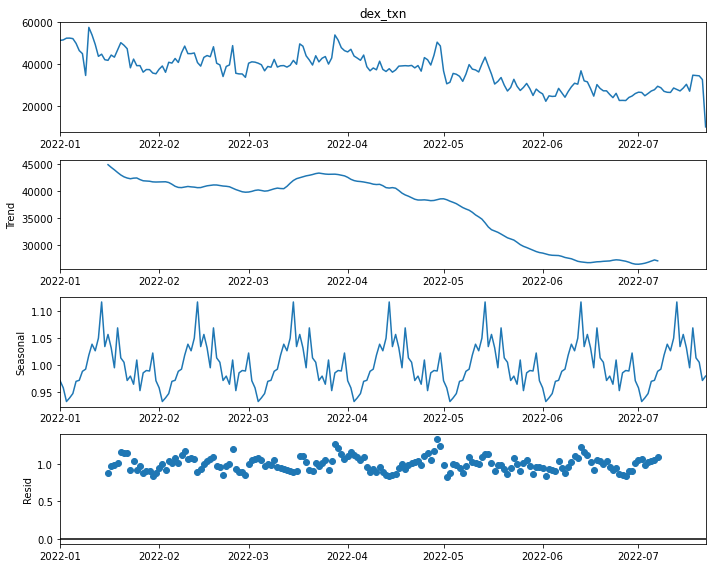

In [22]:
plt.rcParams.update({'figure.figsize': (10,8)})
decompose = seasonal_decompose(df['dex_txn'],model='multiplicative', period=30)
decompose.plot()
plt.show()

Regarding Trend, Market Number of Transactions has a downtrend. The most obvious downtrend starts from April 2022.

Regarding Seasonal, Market Number of Transactions has an increasing pattern around the beginning-mid-month and decreasing towards the end of the month.

### 2. Platform Number of Transactions 

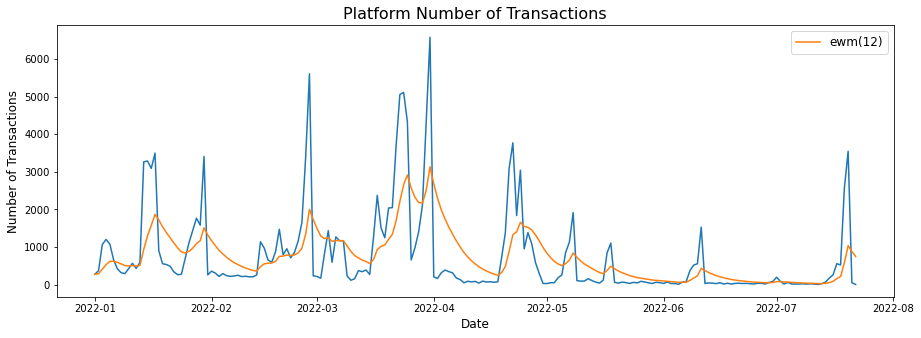

In [23]:
plt.figure(figsize=(15, 5))
plt.plot(df["plat_txn"])
plt.plot(df_ewm["plat_txn"], label="ewm(12)")
plt.xlabel("Date", fontsize=12)
plt.ylabel("Number of Transactions", fontsize=12)
plt.title("Platform Number of Transactions", fontsize=16)
plt.legend(fontsize=12)
plt.show()

In [24]:
outlier_idxs=detect_outliers(df["plat_vol"])
print(df.index[outlier_idxs].values)

[datetime.date(2022, 1, 14) datetime.date(2022, 1, 15)
 datetime.date(2022, 1, 16) datetime.date(2022, 1, 17)
 datetime.date(2022, 1, 26) datetime.date(2022, 1, 29)
 datetime.date(2022, 1, 30) datetime.date(2022, 2, 21)
 datetime.date(2022, 2, 24) datetime.date(2022, 2, 26)
 datetime.date(2022, 2, 27) datetime.date(2022, 3, 19)
 datetime.date(2022, 3, 20) datetime.date(2022, 3, 21)
 datetime.date(2022, 3, 29) datetime.date(2022, 3, 30)
 datetime.date(2022, 3, 31) datetime.date(2022, 4, 21)
 datetime.date(2022, 4, 24) datetime.date(2022, 5, 8)
 datetime.date(2022, 6, 11) datetime.date(2022, 7, 19)
 datetime.date(2022, 7, 20)]


#### The periods when there is a significant increase in Platform Number of Transactions¶ are:
<ul>
    <li>2022/01/14 - 2022/01/17</li>
    <li>2022/01/26 - 2022/01/30</li>
    <li>2022/02/24</li>
    <li>2022/02/24 - 2022/02/27</li>
    <li>2022/03/19 - 2022/03/21</li>
    <li>2022/03/29 - 2022/03/31</li>
    <li>2022/04/21 - 2022/04/24</li>
    <li>2022/05/08</li>
    <li>2022/06/11</li>
    <li>2022/07/19 - 2022/07/20</li>
</ul> 

#### Trend, Seasonal, Error

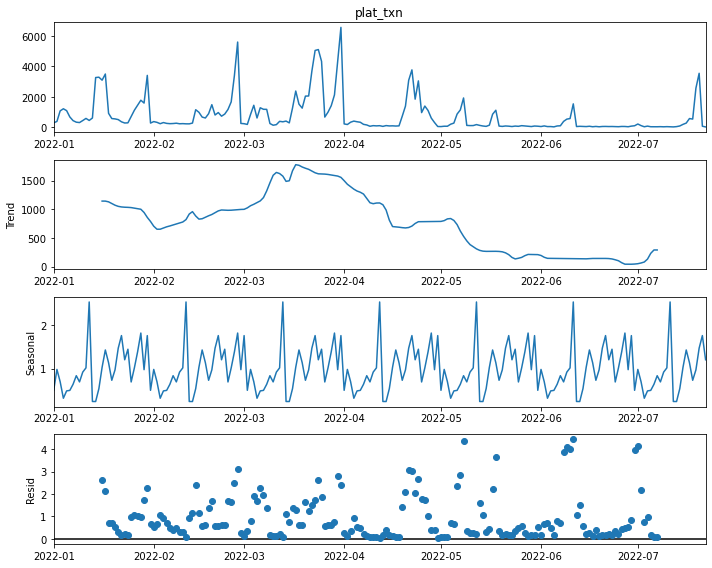

In [25]:
plt.rcParams.update({'figure.figsize': (10,8)})
decompose = seasonal_decompose(df['plat_txn'],model='multiplicative', period=30)
decompose.plot()
plt.show()

Regarding Trend, Platform Number of Transactions has a downtrend. The most obvious downtrend started from mid-March 2022.

Regarding the Seasonal, Platform Number of Transactions has an increasing pattern around the beginning-mid of the month, decreasing and then increasing again at the end of the month.

### 3. Correlation

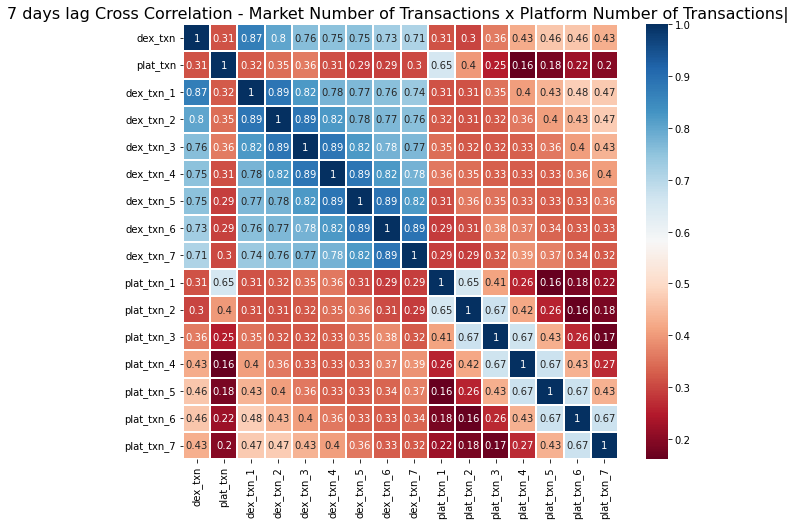

In [26]:
txnn = shift_time(df[['dex_txn', 'plat_txn']], 7)

plt.figure(figsize=(10, 8))
plt.title('7 days lag Cross Correlation - Market Number of Transactions x Platform Number of Transactions| ', size=16)
svm = sns.heatmap(txnn.corr(), linewidths=0.1,vmax=1.0, square=True, cmap=plt.cm.RdBu, linecolor='white', annot=True)

Looking at the Cross Correlation Matrix, Market Number of Transactions and Platform Number of Transactions correlate best with lag parameter 3 (0.36).

And the Market Number of Transactions itself also has high autocorrelation (the Maxtrix Correlation chart is all green), indicating that the Transactions Index is quite sensitive to past fluctuations. Moreover, Platform Number of Transactions has a fairly high level of autocorrelation at lag=1 (0.65), further confirming the above assumption.

However, the Cross Correlation coefficient of Platform Number of Transactions at lag levels 1-7 relative to Market is more stable than its own volatility in the past. Therefore, it can be said that Market's influence is longer.

### 4. Conclusion

After analyzing the volatility of Market Number of Transactions and PLatform Number of Transactions, we draw the following comments and assumptions:

#### Trend
If we only analyze the Volume of Market and Platform, we can't see a clear correlation, then when we analyze the Number of Transactions, we can have more confidence in the assumption, because of the following comments:
<ul>
    <li>Market Number of Transactions and Platform Number of Transactions have decreased in tandem.
    <li>Trend decrease is most obvious from April 2022 onwards
</ul>

#### Ouliers
Because Market Number of Transactions only appeared 1 notable outlier on 2022/07/22 (probably mostly due to data logging errors). So we will look at the times when Market Volume spikes, and look at the Number of Transactions at the Platform at that time.
###### Market Volume peak:
<ul>
    <li>2022/01/07: average number of transactions</li>
    <li>2022/01/21 - 2022/01/24: high trading volume</li>
    <li>2022/01/26 - 2022/01/28: high trading volume</li>
    <li>2022/02/24: high volume of transactions</li>
    <li>2022/05/08 - 2022/05/13: transaction volume is above average</li>
    <li>2022/06/13 - 2022/06/15: average number of transactions</li>
    <li>2022/07/22</li>
</ul>

##### Platform Number of Transactions:
<ul>
    <li>2022/01/14 - 2022/01/17</li>
    <li>2022/01/26 - 2022/01/30</li>
    <li>2022/02/24</li>
    <li>2022/02/24 - 2022/02/27</li>
    <li>March 2022 - March 2022</li>
    <li>2022/03/29 - 2022/03/31</li>
    <li>2022/04/21 - 2022/04/24</li>
    <li>2022/05/08</li>
    <li>2022/06/11</li>
    <li>2022/07/19 - 2022/07/20</li>
</ul>
    
##### Comment:
<ul>
    <li> Almost every time Market Volume records spikes, the number of transactions on Platform is either high or average/above average.
    <li>At the time of 2022/05/08 - 2022/05/13 recording a record Market Volume since the beginning of the year, Platform also recorded an above-average number of transactions. (It is possible that the traders on the Platform exchange reacted quite lightly to the general market crash.)
    <li>At times when the PLatform Number of Transactions reached a very high level, the Market Volume remained fairly normal. There are even times when Platform Number of Transactions spikes 2-3 days before Market Volume. (Assumption: Maybe that is the time when marketing campaigns appear, promoting transactions).
</ul>

#### Seasonal
Market Number of Transactions and Platform Number of Transactions both have strong bullish patterns near the beginning of the month.
<br>However, for PLatform Volume, there appeared a pattern that continued to increase strongly at the end of the month instead of decreasing steadily like Market Volume. Maybe this difference comes from the marketing campaigns launched at the end of the month.

#### Correlation
With a lag parameter of 3 days, Platform Number of Transactions and Market Number of Transactions have a rather high positive correlation coefficient (0.36).
<br>So, it can be remarked that when the number of transactions on the market decreased, the same thing was recorded on the PLatform. And the effect occurs most clearly after 3 days since the general market fluctuated.
<br>And Market Number of Transactions itself also has high autocorrelation (Maxtrix Correlation histogram is all green), indicating that the Transaction Volume index is quite sensitive to past fluctuations. We also see that Platform Number of Transactions has a fairly high level of autocorrelation at lag=1 (0.65), which makes us even more certain of the above hypothesis.
<br>However, the Cross Correlation coefficient of Platform Number of Transactions at lag levels 1-7 relative to Market is more stable than its own volatility in the past. So it can be said that Market's influence is longer.


## III. Average Volume per Transaction

### 1. Market  AVG Volume per Transaction

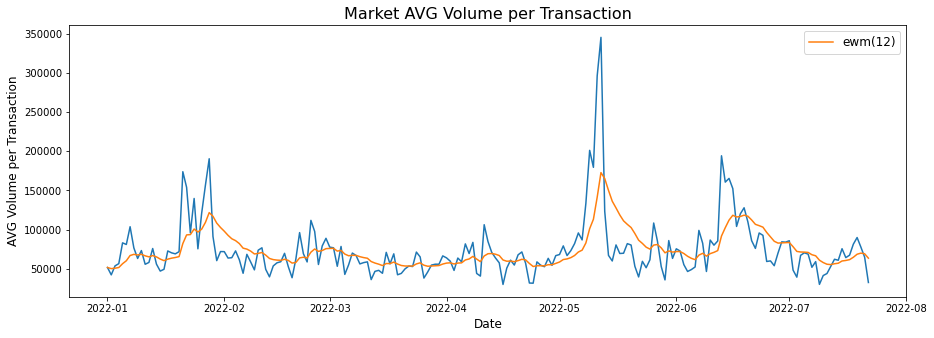

In [27]:
plt.figure(figsize=(15, 5))
plt.plot(df["dex_vol/txn"])
plt.plot(df_ewm["dex_vol/txn"], label="ewm(12)")
plt.xlabel("Date", fontsize=12)
plt.ylabel("AVG Volume per Transaction", fontsize=12)
plt.title("Market AVG Volume per Transaction", fontsize=16)
plt.legend(fontsize=12)
plt.show()

Market AVERAGE Volume per Transaction has a very similar volatility to Market Volume

In [28]:
df[['dex_vol', 'dex_vol/txn']].corr()

,dex_vol,dex_vol/txn
dex_vol,1.000000,0.924878
dex_vol/txn,0.924878,1.000000


The Correlation coefficient between Market AVG Volume per Transaction and Market Volume even gives very high results (0.92), showing the 'similarity' of these two time series.

### 2. Platform AVG Volume per Transaction

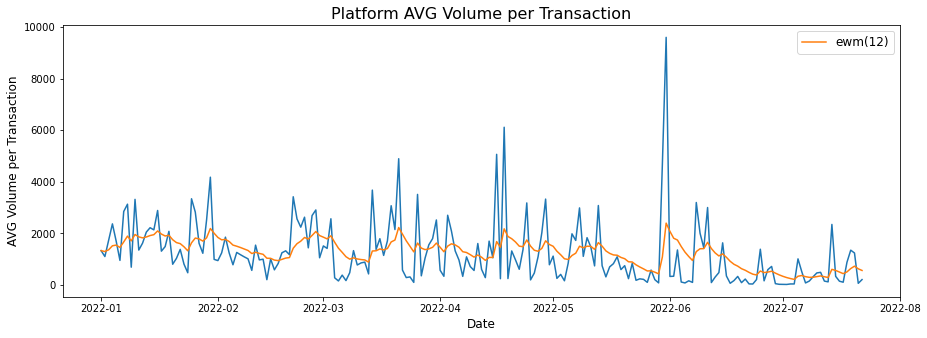

In [29]:
plt.figure(figsize=(15, 5))
plt.plot(df["plat_vol/txn"])
plt.plot(df_ewm["plat_vol/txn"], label="ewm(12)")
plt.xlabel("Date", fontsize=12)
plt.ylabel("AVG Volume per Transaction", fontsize=12)
plt.title("Platform AVG Volume per Transaction", fontsize=16)
plt.legend(fontsize=12)
plt.show()

#### Trend, Seasonal, Error

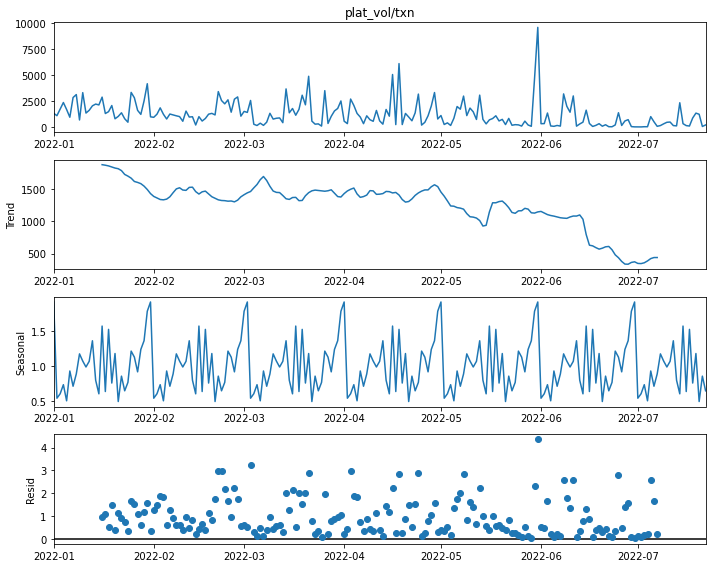

In [30]:
plt.rcParams.update({'figure.figsize': (10,8)})
decompose = seasonal_decompose(df['plat_vol/txn'],model='multiplicative', period=30)
decompose.plot()
plt.show()

Regarding Trend, Platform AVG Volume per Transaction tends to move sideways and decrease slightly from early 2022 to May 2022, and starts to appear stronger from here.

In [31]:
df[['plat_vol', 'plat_vol/txn']].corr()

,plat_vol,plat_vol/txn
plat_vol,1.000000,0.452959
plat_vol/txn,0.452959,1.000000


### 3. Correlation

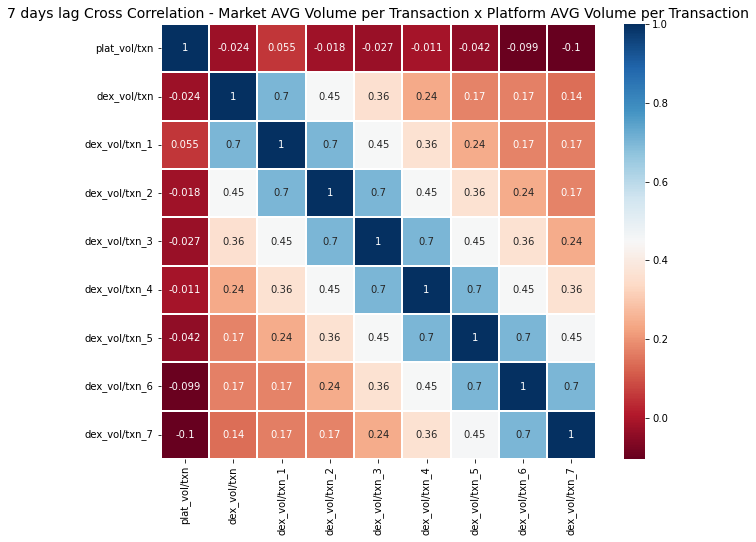

In [32]:
dex_vol_txn_shifted = shift_time(df[['dex_vol/txn']], 7)
df_shifted3 = pd.concat([df[['plat_vol/txn']], dex_vol_txn_shifted], axis=1)

plt.figure(figsize=(10, 8))
plt.title('7 days lag Cross Correlation - Market AVG Volume per Transaction x Platform AVG Volume per Transaction', size=14)
svm = sns.heatmap(df_shifted3.corr(), linewidths=0.1,vmax=1.0, square=True, cmap=plt.cm.RdBu, linecolor='white', annot=True)

Market AVERAGE Volume per Transaction and Platform AVERAGE Volume per Transaction have fairly low Correlation coefficients (approximately 0) regardless of lag parameters.

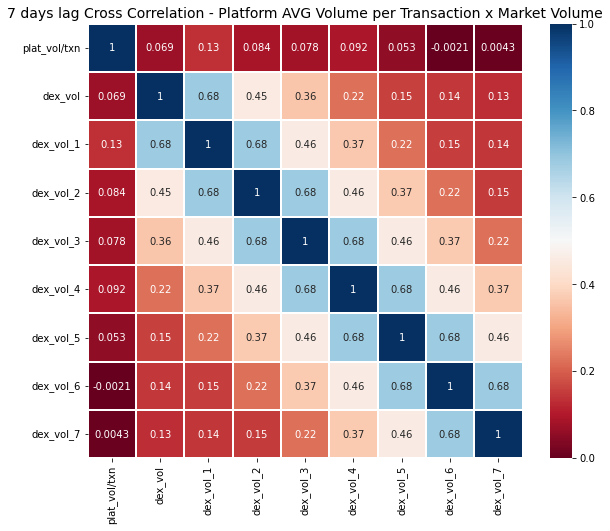

In [33]:
dex_vol = shift_time(df[['dex_vol']], 7)
df_shifted10 = pd.concat([df[['plat_vol/txn']], dex_vol], axis=1)

plt.figure(figsize=(10, 8))
plt.title('7 days lag Cross Correlation - Platform AVG Volume per Transaction x Market Volume', size=14)
svm = sns.heatmap(df_shifted10.corr(), linewidths=0.1,vmax=1.0, square=True, cmap=plt.cm.RdBu, linecolor='white', annot=True)

Market AVERAGE Volume per Transaction and Platform AVERAGE Volume per Transaction have the highest positive Correlation coefficient of 0.13 at lag = 1

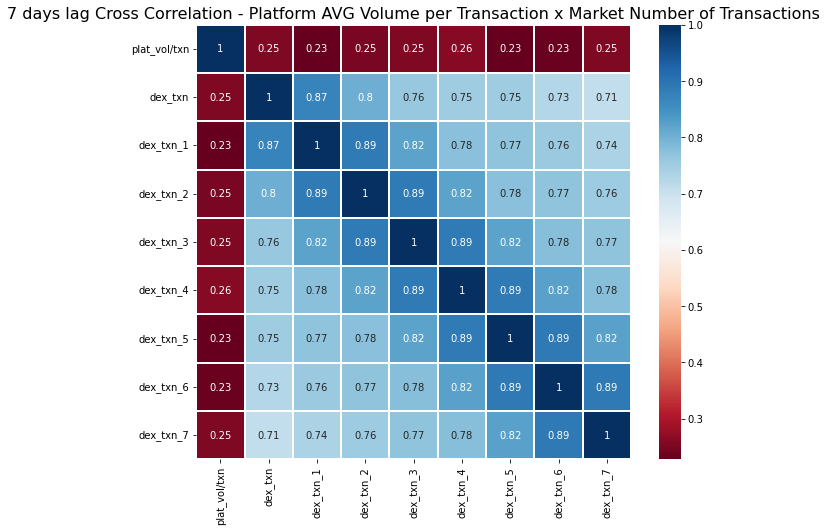

In [34]:
dex_txn = shift_time(df[['dex_txn']], 7)
df_shifted11 = pd.concat([df[['plat_vol/txn']], dex_txn], axis=1)

plt.figure(figsize=(10, 8))
plt.title('7 days lag Cross Correlation - Platform AVG Volume per Transaction x Market Number of Transactions', size=16)
svm = sns.heatmap(df_shifted11.corr(), linewidths=0.1,vmax=1.0, square=True, cmap=plt.cm.RdBu, linecolor='white', annot=True)

Market Number of Transactions and Platform AVG Volume per Transaction have quite good Correlation coefficients at all lag levels 1-7 (0.23 - 0.26).

### 4. Conclusion

After analyzing the volatility of Market AVG Volume per Transaction and Platform AVG Volume per Transaction, we draw the following comments and assumptions:

#### Trend
If there is a very high correlation between Market Volume and Market AVG Volume per Transaction (0.92), then between Platform Volume and Platform AVG Volume per Transaction the correlation is more modest (0.45).
<br>Graphically, the Trend chart of Platform Volume and Platform AVG Volume per Transaction also shows 'smooth' (less volatility) compared to the trend chart of Market AVG Volume per Transaction.

##### Hypothesis:
<ul>
    <li>Market AVG Volume per Transaction represents the volatility of the entire Market, where all traders from sharks to retail traders are concentrated. So their transaction amounts are very different. And when adding up the total transactions of the day, Market Volume per Transaction also reflects the same as Market Volume.</li>
    <li>As for the Platform, where only a certain number of traders/groups of traders are concentrated, the transaction behavior/form/type is highly dependent on service tariffs, taxes, commissions, promotions, marketing,... So on the Platform, AVG Volume per Transaction is not general and follows the total Volume as compared to Market.</li>
    <li>There is an unusual point that at the end of June 2022, Platform AVG Volume per Transaction reached a sudden high (record), while Platform Volume and Platform Number of Transactions at this time only reached a very low level, even hit the Min threshold ????
</ul>

#### Correlation
Market Volume per Transaction and Platform Volume per Transaction have fairly low Correlation coefficients (approximately 0) regardless of lag parameters.
<br>As such, it can be remarked that Market Volume per Transaction and Platform Volume per Transaction have no significant correlation.
<br>However, Market Number of Transactions and Platform AVG Volume per Transaction with Correlation coefficients have pretty good Correlation coefficients at all lag levels 1-7 (0.23 - 0.26). And as we have analyzed the other indicators above, we also find that the Market Number of Transactions has the greatest influence and the longest space of influence with the volume of transactions on the Platform.

## IV. Platform Wallets

### 1. Unique Wallets Number

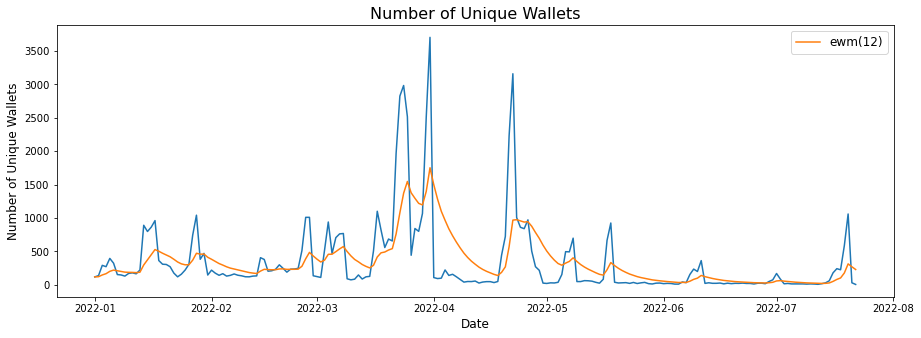

In [35]:
plt.figure(figsize=(15, 5))
plt.plot(df["unique_wal"])
plt.plot(df_ewm["unique_wal"], label="ewm(12)")
plt.xlabel("Date", fontsize=12)
plt.ylabel("Number of Unique Wallets", fontsize=12)
plt.title("Number of Unique Wallets", fontsize=16)
plt.legend(fontsize=12)
plt.show()

Number of Unique Wallets tends to increase from the beginning of 2022, peaking in April 2022, then decreasing until now.

In [36]:
df[[ 'unique_wal', 'plat_vol', 'plat_txn']].corr()

,unique_wal,plat_vol,plat_txn
unique_wal,1.000000,0.529360,0.895349
plat_vol,0.529360,1.000000,0.786273
plat_txn,0.895349,0.786273,1.000000


Number of Unique Wallets, Platform Volume, Platform Number of Transactions have quite good correlation, 0.52 and 0.89 respectively.
Indeed, at the time when Platform Volume peaked (late April 2022), Number of Unique Wallets also peaked, while Market Volume at this time only reached normal levels. Maybe this is the time when Marketing Compaign is very effective and attracts many new users.

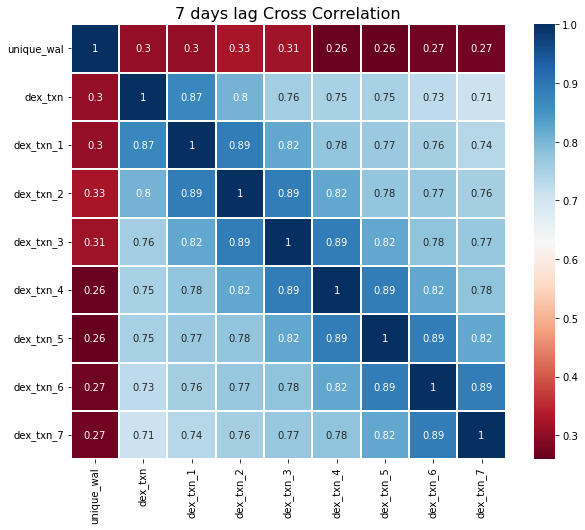

In [37]:
dex_txn_shifted = shift_time(df[['dex_txn']], 7)
df_shifted4 = pd.concat([df[['unique_wal']], dex_txn_shifted], axis=1)

plt.figure(figsize=(10, 8))
plt.title('7 days lag Cross Correlation', size=16)
svm = sns.heatmap(df_shifted4.corr(), linewidths=0.1,vmax=1.0, square=True, cmap=plt.cm.RdBu, linecolor='white', annot=True)

Number of Unique Wallets and Market Number of Transactions have a high positive correlation (0.33) at parameter lag=2. It is possible that at a time when the Market is active with high transaction levels, the probability of customers opening a new Wallet is also higher.

### 2. Average Volume per Wallet

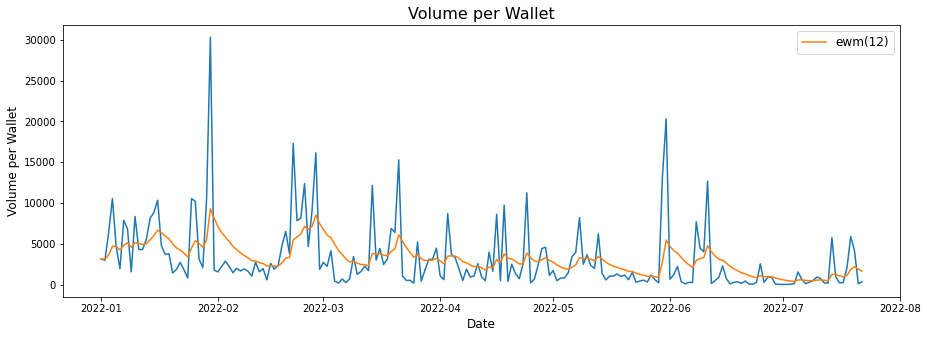

In [38]:
plt.figure(figsize=(15, 5))
plt.plot(df["plat_vol/wallet"])
plt.plot(df_ewm["plat_vol/wallet"], label="ewm(12)")
plt.xlabel("Date", fontsize=12)
plt.ylabel("Volume per Wallet", fontsize=12)
plt.title("Volume per Wallet", fontsize=16)
plt.legend(fontsize=12)
plt.show()

Average Volume per Wallet is also trending down.

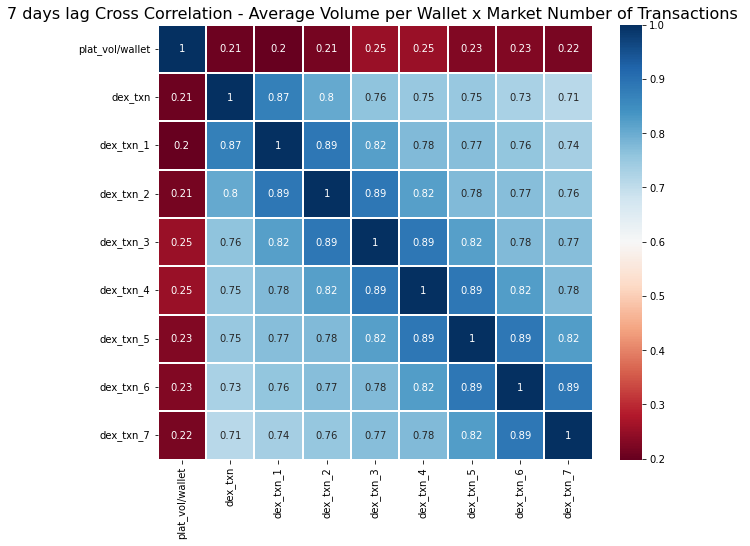

In [39]:
dex_txn_shifted = shift_time(df[['dex_txn']], 7)
df_shifted5 = pd.concat([df[['plat_vol/wallet']], dex_txn_shifted], axis=1)

plt.figure(figsize=(10, 8))
plt.title('7 days lag Cross Correlation - Average Volume per Wallet x Market Number of Transactions ', size=16)
svm = sns.heatmap(df_shifted5.corr(), linewidths=0.1,vmax=1.0, square=True, cmap=plt.cm.RdBu, linecolor='white', annot=True)

Average Volume per Wallet x Market Number of Transactions has a pretty good Correlation coefficient at all lag levels 1-7, highest at lag=3 with Coef=0.25

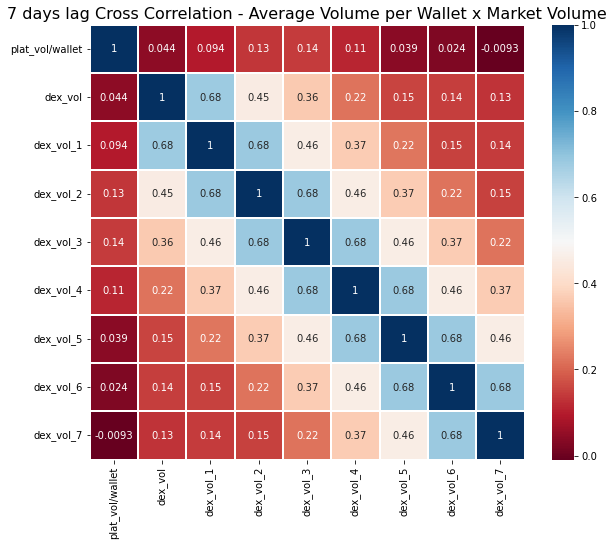

In [40]:
dex_vol_shifted = shift_time(df[['dex_vol']], 7)
df_shifted6 = pd.concat([df[['plat_vol/wallet']], dex_vol_shifted], axis=1)

plt.figure(figsize=(10, 8))
plt.title('7 days lag Cross Correlation - Average Volume per Wallet x Market Volume', size=16)
svm = sns.heatmap(df_shifted6.corr(), linewidths=0.1,vmax=1.0, square=True, cmap=plt.cm.RdBu, linecolor='white', annot=True)

Average Volume per Wallet and Market Volume reached the highest Correlation of 0.13-0.14 at lag = 2-3.

## V. Conclusion

#### Through the analysis, we can conclude and make the following assumptions:
##### Conclusion:
<ul>
    <li>Trends and fluctuations of the market have an impact on the decline in Trading Volume and other indices on the Platform.</li>
    <li>The market factor that has the biggest influence on the platform's transaction volume is the Number of Transactions.</li>
    <li>If the Platform reacts to Market Volume fluctuations most clearly and with a sliding parameter level of 2-3 days (Platform runs 2-3 days after Market), then Market Number of Transactions has a great influence. faster, and with longer room for influence.</li>
</ul>

##### Assumptions:
<ul>
    <li>There are times when the Platform reaches the Transaction Volume level, and other indexes spike while the Market index stays at a normal level. Maybe this is the time when Platform has effective Marketing campaigns.</li>
    <li>Platform is a place where only a certain number of traders/groups of traders gather, whose transaction behavior/form/type is highly dependent on service tariffs, taxes, commissions, promotions, marketing, etc. .. So on the Platform, the indexes are not general and follow big fluctuations like compared to the general indexes of the whole Market.</li>
</ul>